In [4]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn para transformaciones
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Configuración de visualización
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('whitegrid')

# Verificar versiones
print(f"Pandas versión: {pd.__version__}")
print(f"NumPy versión: {np.__version__}")
import sklearn
print(f"Scikit-learn versión: {sklearn.__version__}")

Pandas versión: 2.3.3
NumPy versión: 2.2.6
Scikit-learn versión: 1.8.0


## 🟢 Ejercicio 1: Estandarización con StandardScaler

Aplica StandardScaler a un dataset de empleados:

```python
rng = np.random.default_rng(42)
df_empleados = pd.DataFrame({
    'edad': rng.integers(22, 65, 100),
    'salario': rng.integers(20000, 80000, 100),
    'años_experiencia': rng.integers(0, 40, 100)
})
```

**Tareas:**
1. Muestra las estadísticas originales (media y desviación estándar) de cada columna
2. Aplica `StandardScaler` a todas las columnas numéricas
3. Muestra las estadísticas después del escalado (deben ser media≈0, std≈1)
4. Crea un gráfico comparando la distribución antes y después del escalado
5. Explica con tus palabras: ¿qué hace StandardScaler?

---Estadisticas Originales---
           edad       salario  años_experiencia
mean  46.982479  39410.730968         28.019218
std   26.942648  26192.180429         31.371010
---Estadisticas Escaladas---
       edad  salario  años_experiencia
mean  12.62    12.64             12.64
std   35.32    35.32             35.32


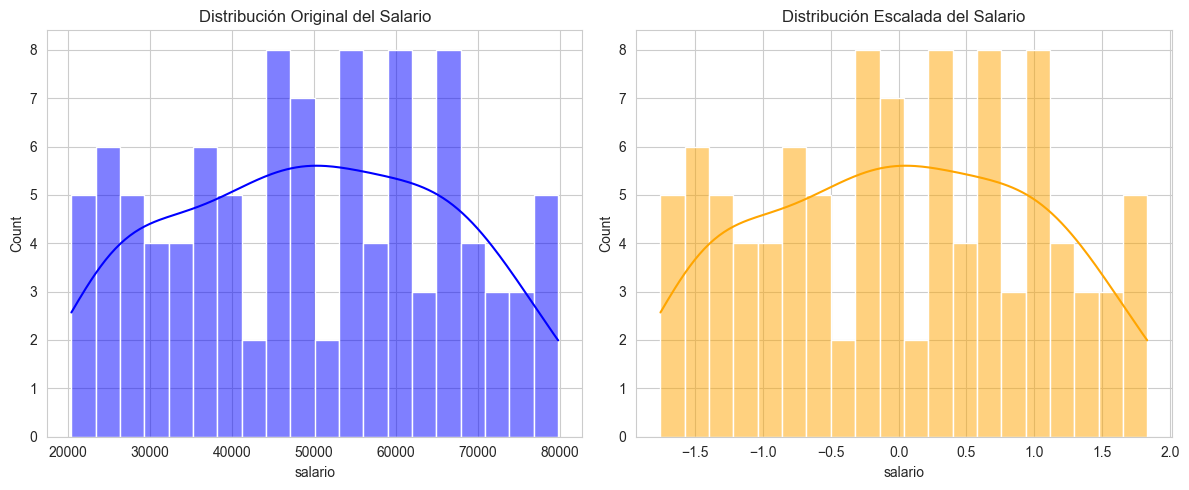

In [9]:
# Crear el DataFrame
rng = np.random.default_rng(42)
df_empleados = pd.DataFrame({
    'edad': rng.integers(22, 65, 100),
    'salario': rng.integers(20000, 80000, 100),
    'años_experiencia': rng.integers(0, 40, 100)
})

# Tu código aquí

# 1. Muestra las estadísticas originales (media y desviación estándar) de cada columna
print("---Estadisticas Originales---")
print(df_empleados.describe().agg(['mean','std']))

# 2. Aplica `StandardScaler` a todas las columnas numéricas
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_empleados), columns=df_empleados.columns)
# 3. Muestra las estadísticas después del escalado (deben ser media≈0, std≈1)
print("---Estadisticas Escaladas---")
print(df_scaled.describe().agg(['mean','std']).round(2))
# 4. Crea un gráfico comparando la distribución antes y después del escalado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_empleados['salario'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución Original del Salario')
sns.histplot(df_scaled['salario'], bins=20, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribución Escalada del Salario')
plt.tight_layout()
plt.show()
# 5. Explica con tus palabras: ¿qué hace StandardScaler?
# Es un transformador que su funcion es resta la media y divide por la desviacion estandar. Las variables que tengan media 0 y varianza 1, elminando unidades para que la ia no se confunda


## 🟢 Ejercicio 2: Normalización con MinMaxScaler

Usando el mismo dataset de empleados:

**Tareas:**
1. Aplica `MinMaxScaler` para escalar los datos al rango [0, 1]
2. Verifica que todos los valores están entre 0 y 1
3. Aplica MinMaxScaler con rango personalizado [0, 10]
4. Compara visualmente StandardScaler vs MinMaxScaler en un gráfico
5. Explica: ¿Cuándo es mejor usar MinMaxScaler en lugar de StandardScaler?

---Valores MinMax escalados---
      edad  salario  años_experiencia
min    0.0      0.0               0.0
max  100.0    100.0             100.0


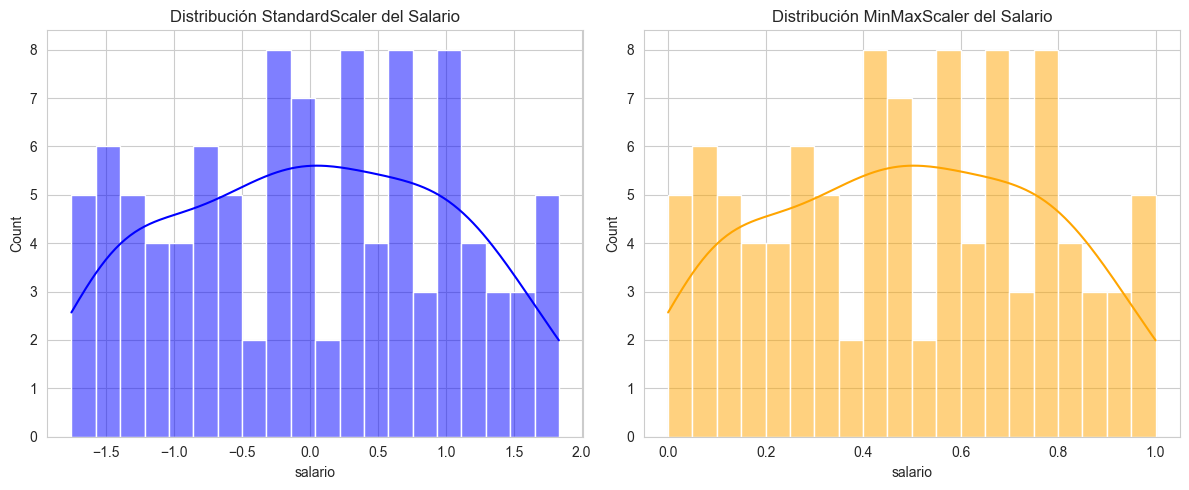

In [ ]:
# Tu código aquí

# 1. Aplica `MinMaxScaler` para escalar los datos al rango [0, 1]
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_empleados), columns=df_empleados.columns)
# 2. Verifica que todos los valores están entre 0 y 1
print("---Valores MinMax escalados---")
print(df_minmax_scaled.describe().agg(['min','max']))
# 3. Aplica MinMaxScaler con rango personalizado [0, 10]
scaler_minmax_0_10 = MinMaxScaler(feature_range=(0, 10))
df_minmax_0_10 = pd.DataFrame(scaler_minmax_0_10.fit_transform(df_empleados), columns=df_empleados.columns)
# 4. Compara visualmente StandardScaler vs MinMaxScaler en un gráfico
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_scaled['salario'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución StandardScaler del Salario')
sns.histplot(df_minmax_scaled['salario'], bins=20, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribución MinMaxScaler del Salario')
plt.tight_layout()
plt.show()
# 5. Explica: ¿Cuándo es mejor usar MinMaxScaler en lugar de StandardScaler?
# Viendo que transforma los datos para que queden entre 0-1, es mejor usarlo cuando sabes que tus datos tienen un valor minimo y uno maximos fijos. Tambien es mejor cuando tus datos tienen media 0 y varianza 1, ya que no se veran afectados por los outliers. En cambio, StandardScaler es mejor cuando tus datos tienen una distribucion normal y quieres eliminar las unidades para que la ia no se confunda.

## 🟢 Ejercicio 3: RobustScaler - Escalado Robusto a Outliers

Trabaja con datos que contienen outliers:

```python
rng = np.random.default_rng(42)
# Datos normales + outliers extremos
salarios_normales = rng.normal(35000, 8000, 95)
salarios_outliers = np.array([150000, 200000, 300000, 500000, 1000000])  # CEOs
salarios = np.concatenate([salarios_normales, salarios_outliers])

df_outliers = pd.DataFrame({'salario': salarios})
```

**Tareas:**
1. Aplica StandardScaler y observa cómo se ven los datos escalados
2. Aplica MinMaxScaler y observa cómo se ven los datos escalados
3. Aplica RobustScaler y observa cómo se ven los datos escalados
4. Crea un gráfico comparativo de los tres métodos (3 histogramas)
5. Explica: ¿Por qué RobustScaler maneja mejor los outliers?

---Estadisticas StandardScaler con Outliers---
mean    13.59
std     35.04
Name: salario_scaled, dtype: float64
---Estadisticas MinMaxScaler con Outliers---
min      0.0
max    100.0
Name: salario_minmax, dtype: float64
---Estadisticas RobustScaler con Outliers---
mean    28.18
std     48.46
Name: salario_robust, dtype: float64


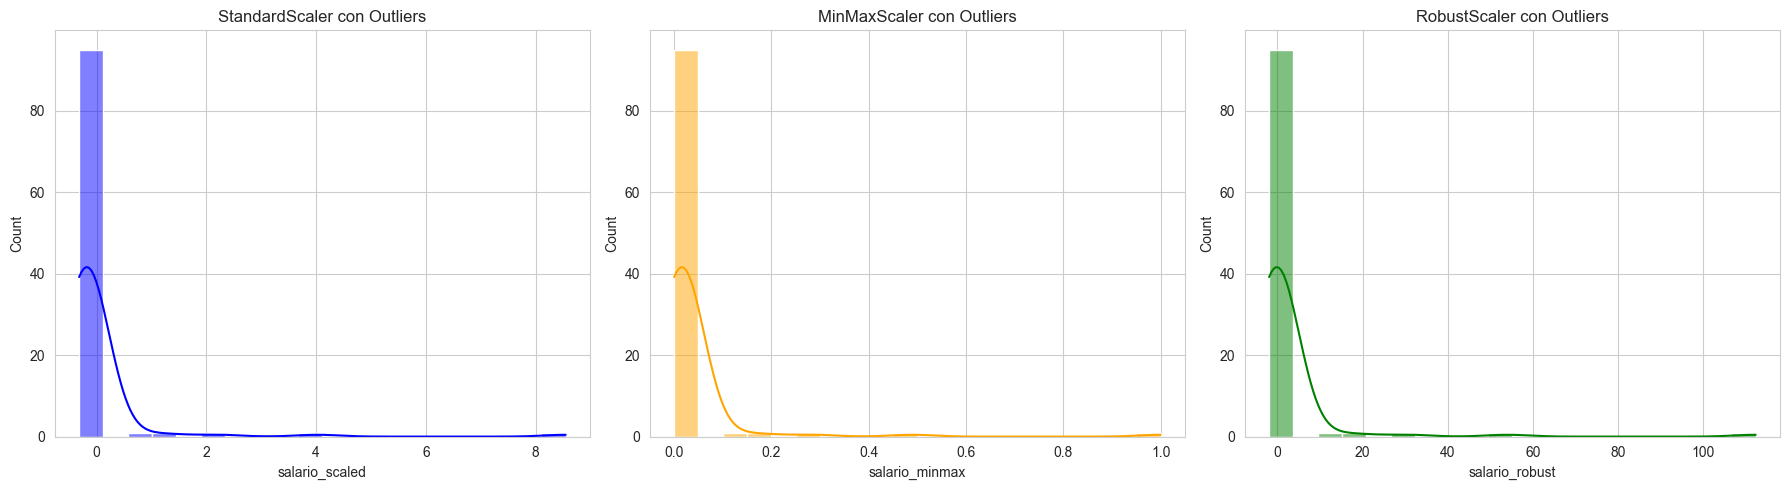

In [5]:
# Crear el DataFrame
rng = np.random.default_rng(42)
salarios_normales = rng.normal(35000, 8000, 95)
salarios_outliers = np.array([150000, 200000, 300000, 500000, 1000000])
salarios = np.concatenate([salarios_normales, salarios_outliers])

df_outliers = pd.DataFrame({'salario': salarios})

# Tu código aquí

# 1. Aplica StandardScaler y observa cómo se ven los datos escalados
scaler = StandardScaler()
df_outliers['salario_scaled'] = scaler.fit_transform(df_outliers[['salario']])
print("---Estadisticas StandardScaler con Outliers---")
print(df_outliers['salario_scaled'].describe().agg(['mean','std']).round(2))
# 2. Aplica MinMaxScaler y observa cómo se ven los datos escalados
min_scaler = MinMaxScaler()
df_outliers['salario_minmax'] = min_scaler.fit_transform(df_outliers[['salario']])
print("---Estadisticas MinMaxScaler con Outliers---")
print(df_outliers['salario_minmax'].describe().agg(['min','max']).round(2))
# 3. Aplica RobustScaler y observa cómo se ven los datos escalados
robust_scaler = RobustScaler()
df_outliers['salario_robust'] = robust_scaler.fit_transform(df_outliers[['salario']])
print("---Estadisticas RobustScaler con Outliers---")
print(df_outliers['salario_robust'].describe().agg(['mean','std']).round(2))
# 4. Crea un gráfico comparativo de los tres métodos (3 histogramas)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_outliers['salario_scaled'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('StandardScaler con Outliers')
sns.histplot(df_outliers['salario_minmax'], bins=20, kde=True, ax=axes[1], color='orange')
axes[1].set_title('MinMaxScaler con Outliers')
sns.histplot(df_outliers['salario_robust'], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title('RobustScaler con Outliers')
plt.tight_layout()
plt.show()
# 5. Explica: ¿Por qué RobustScaler maneja mejor los outliers?
# RobustScaler utiliza la mediana y el Rango Intercuartílico (IQR) para escalar los datos, lo que lo hace menos sensible a los valores extremos. Sin embargo, StandardScaler y MinMaxScaler utilizan el rango total de los datos. Por eso Robust es mas efectivo.

## 🟡 Ejercicio 4: Codificación de Variables Categóricas - One-Hot Encoding

Codifica variables categóricas nominales (sin orden):

```python
df_categorico = pd.DataFrame({
    'ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Madrid', 'Sevilla', 
               'Barcelona', 'Madrid', 'Valencia', 'Sevilla', 'Madrid'],
    'tipo_contrato': ['Indefinido', 'Temporal', 'Indefinido', 'Prácticas',
                      'Temporal', 'Indefinido', 'Prácticas', 'Temporal',
                      'Indefinido', 'Temporal'],
    'salario': [35000, 28000, 32000, 18000, 30000, 42000, 20000, 27000, 38000, 29000]
})
```

**Tareas:**
1. Usa `pd.get_dummies()` para aplicar One-Hot Encoding a 'ciudad'
2. Usa `OneHotEncoder` de sklearn para codificar 'tipo_contrato'
3. Muestra el DataFrame resultante con todas las columnas codificadas
4. Explica qué es el problema de la "trampa de las variables dummy" y cómo evitarlo
5. Usa `drop_first=True` en get_dummies y explica por qué se hace

In [ ]:
# Crear el DataFrame
df_categorico = pd.DataFrame({
    'ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Madrid', 'Sevilla', 
               'Barcelona', 'Madrid', 'Valencia', 'Sevilla', 'Madrid'],
    'tipo_contrato': ['Indefinido', 'Temporal', 'Indefinido', 'Prácticas',
                      'Temporal', 'Indefinido', 'Prácticas', 'Temporal',
                      'Indefinido', 'Temporal'],
    'salario': [35000, 28000, 32000, 18000, 30000, 42000, 20000, 27000, 38000, 29000]
})

# Tu código aquí

# 1. Usa `pd.get_dummies()` para aplicar One-Hot Encoding a 'ciudad'
df_ciudad = pd.get_dummies(df_categorico, columns=['ciudad'], prefix='ciudad')
# 2. Usa `OneHotEncoder` de sklearn para codificar 'tipo_contrato'
encoder = OneHotEncoder(sparse_output=False)
tipo_contrato_encoded = encoder.fit_transform(df_categorico[['tipo_contrato']])
tipo_contrato_df = pd.DataFrame(tipo_contrato_encoded, columns=encoder.get_feature_names_out(['tipo_contrato']))
df_tipo_contrato = pd.concat([df_categorico.drop('tipo_contrato', axis=1), tipo_contrato_df], axis=1)

# 3. Muestra el DataFrame resultante con todas las columnas codificadas
print("DataFrame con One-Hot Encoding de 'ciudad':")
print(df_ciudad)
print("\nDataFrame con One-Hot Encoding de 'tipo_contrato':")
print(df_tipo_contrato)

# 4. Explica qué es el problema de la "trampa de las variables dummy" y cómo evitarlo
# Ocurre cuando dos o mas variables independientes estan tan correlacionads que una puede predecirse a partir de las demas. Cual es el problema? qSi incluyes todas las categorias creadas, la suma de todas esas columnas siempre sera igual a q. Esto entra en conflicto directo con el termino intercepcion de modelos lineales, provocando que la matriz de los dastos sean singular y no se puedan invertir. 
# 5. Usa `drop_first=True` en get_dummies y explica por qué se hace
# Para evitarlo, se puede usar `drop_first=True` en `pd.get_dummies()`, lo que elimina una de las categorías y evita la multicolinealidad. De esta manera, el modelo puede interpretar correctamente las relaciones entre las variables sin problemas de singularidad.

DataFrame con One-Hot Encoding de 'ciudad':
  tipo_contrato  salario  ciudad_Barcelona  ciudad_Madrid  ciudad_Sevilla  \
0    Indefinido    35000             False           True           False   
1      Temporal    28000              True          False           False   
2    Indefinido    32000             False          False           False   
3     Prácticas    18000             False           True           False   
4      Temporal    30000             False          False            True   
5    Indefinido    42000              True          False           False   
6     Prácticas    20000             False           True           False   
7      Temporal    27000             False          False           False   
8    Indefinido    38000             False          False            True   
9      Temporal    29000             False           True           False   

   ciudad_Valencia  
0            False  
1            False  
2             True  
3            False  
4  

## 🟡 Ejercicio 5: Ordinal Encoding - Variables con Orden

Codifica variables categóricas ordinales (con orden natural):

```python
df_ordinal = pd.DataFrame({
    'nivel_estudios': ['Secundaria', 'Universidad', 'Máster', 'Secundaria', 
                       'Doctorado', 'Universidad', 'Máster', 'Secundaria',
                       'Doctorado', 'Universidad'],
    'satisfaccion': ['Baja', 'Media', 'Alta', 'Media', 'Muy Alta',
                     'Alta', 'Baja', 'Media', 'Alta', 'Muy Alta'],
    'salario': [25000, 35000, 45000, 28000, 55000, 38000, 42000, 26000, 52000, 40000]
})
```

**Tareas:**
1. Define el orden correcto para 'nivel_estudios': Secundaria < Universidad < Máster < Doctorado
2. Define el orden para 'satisfaccion': Baja < Media < Alta < Muy Alta
3. Aplica `OrdinalEncoder` especificando el orden correcto
4. Verifica que la codificación respeta el orden (Secundaria=0, Doctorado=3)
5. Explica: ¿Por qué NO debemos usar One-Hot Encoding para variables ordinales?

In [ ]:
# Crear el DataFrame
df_ordinal = pd.DataFrame({
    'nivel_estudios': ['Secundaria', 'Universidad', 'Máster', 'Secundaria', 
                       'Doctorado', 'Universidad', 'Máster', 'Secundaria',
                       'Doctorado', 'Universidad'],
    'satisfaccion': ['Baja', 'Media', 'Alta', 'Media', 'Muy Alta',
                     'Alta', 'Baja', 'Media', 'Alta', 'Muy Alta'],
    'salario': [25000, 35000, 45000, 28000, 55000, 38000, 42000, 26000, 52000, 40000]
})

# Tu código aquí

# 1. Define el orden correcto para 'nivel_estudios': Secundaria < Universidad < Máster < Doctorado
orden_nivel_estudios = ['Secundaria', 'Universidad', 'Máster', 'Doctorado']

# 2. Define el orden para 'satisfaccion': Baja < Media < Alta < Muy Alta
orden_satisfaccion = ['Baja', 'Media', 'Alta', 'Muy Alta']

# 3. Aplica `OrdinalEncoder` especificando el orden correcto
ordinal_encoder = OrdinalEncoder(categories=[orden_nivel_estudios, orden_satisfaccion])
df_ordinal[['nivel_estudios_ordinal', 'satisfaccion_ordinal']] = ordinal_encoder.fit_transform(df_ordinal[['nivel_estudios', 'satisfaccion']])

# 4. Verifica que la codificación respeta el orden (Secundaria=0, Doctorado=3)
print("Valores codificados:")
print(df_ordinal[['nivel_estudios_ordinal', 'satisfaccion_ordinal']])

# 5. Explica: ¿Por qué NO debemos usar One-Hot Encoding para variables ordinales?
# No debemos usar One-Hot Encoding para variables ordinales porque pierde la información de orden inherente a los datos. One-Hot Encoding convierte cada categoría en una variable binaria independiente, lo cual no representa correctamente la jerarquía o relación de orden entre las categorías.

Valores codificados:
   nivel_estudios_ordinal  satisfaccion_ordinal
0                     0.0                   0.0
1                     1.0                   1.0
2                     2.0                   2.0
3                     0.0                   1.0
4                     3.0                   3.0
5                     1.0                   2.0
6                     2.0                   0.0
7                     0.0                   1.0
8                     3.0                   2.0
9                     1.0                   3.0


## 🟡 Ejercicio 6: Transformación de Distribuciones Sesgadas

Transforma una distribución sesgada para que sea más normal:

```python
rng = np.random.default_rng(42)
# Distribución exponencial (muy sesgada a la derecha)
ingresos = np.random.exponential(scale=3000, size=500) + 1000
df_sesgado = pd.DataFrame({'ingresos': ingresos})
```

**Tareas:**
1. Calcula el sesgo (skewness) de los datos originales con `scipy.stats.skew()`
2. Aplica transformación **logarítmica** (`np.log1p`)
3. Aplica transformación **Yeo-Johnson** con `PowerTransformer`
4. Compara el sesgo antes y después de cada transformación
5. Crea gráficos (histogramas) comparando: Original vs Log vs Yeo-Johnson
6. Explica: ¿Cuándo es necesario transformar la distribución de una variable?

Sesgo original: 1.48
Sesgo después de log-transformación: 0.22
Sesgo después de Yeo-Johnson: 0.03
Comparación de sesgos:
Original: 1.48, Log: 0.22, Yeo-Johnson: 0.03


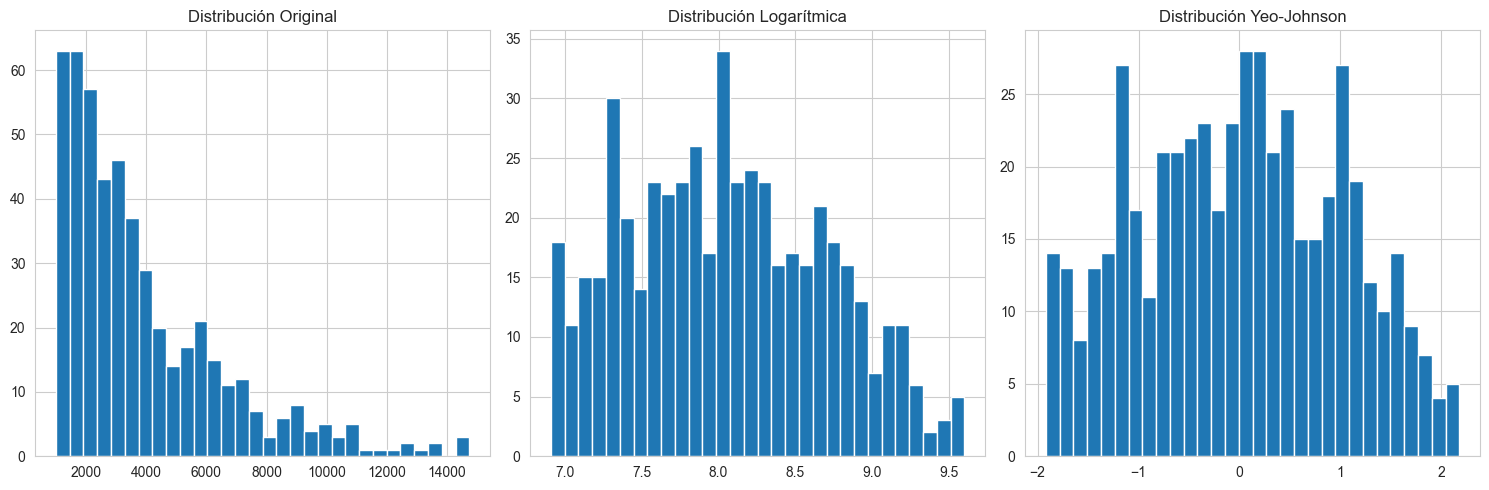

In [ ]:
# Crear el DataFrame
rng = np.random.default_rng(42)
ingresos = np.random.exponential(scale=3000, size=500) + 1000
df_sesgado = pd.DataFrame({'ingresos': ingresos})

from scipy import stats

# Tu código aquí

# 1. Calcula el sesgo (skewness) de los datos originales con `scipy.stats.skew()`
skew_original = stats.skew(df_sesgado['ingresos'])
print(f"Sesgo original: {skew_original:.2f}")

# 2. Aplica transformación **logarítmica** (`np.log1p`)
df_sesgado['ingresos_log'] = np.log1p(df_sesgado['ingresos'])
skew_log = stats.skew(df_sesgado['ingresos_log'])
print(f"Sesgo después de log-transformación: {skew_log:.2f}")
# 3. Aplica transformación **Yeo-Johnson** con `PowerTransformer`
yeo_johnson = PowerTransformer(method='yeo-johnson')
df_sesgado['ingresos_yeo'] = yeo_johnson.fit_transform(df_sesgado[['ingresos']])
skew_yeo = stats.skew(df_sesgado['ingresos_yeo'])
print(f"Sesgo después de Yeo-Johnson: {skew_yeo:.2f}")
# 4. Compara el sesgo antes y después de cada transformación
print(f"Comparación de sesgos:")
print(f"Original: {skew_original:.2f}, Log: {skew_log:.2f}, Yeo-Johnson: {skew_yeo:.2f}")
# 5. Crea gráficos (histogramas) comparando: Original vs Log vs Yeo-Johnson
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(df_sesgado['ingresos'], bins=30)
axes[0].set_title('Distribución Original')
axes[1].hist(df_sesgado['ingresos_log'], bins=30)
axes[1].set_title('Distribución Logarítmica')
axes[2].hist(df_sesgado['ingresos_yeo'], bins=30)
axes[2].set_title('Distribución Yeo-Johnson')
plt.tight_layout()
plt.show()
# 6. Explica: ¿Cuándo es necesario transformar la distribución de una variable?
# Necesario cuando la variable tiene una distribucion sesgada, muchas de las tecnicas del modelado asumen que las estadisticas siguein una distribuccion normal. Si la variable esta sesgada, puede afectar negativamente el rendimiento del modelo. 

## 🟡 Ejercicio 7: Feature Engineering - Creación de Nuevas Variables

Crea nuevas variables a partir de las existentes:

```python
rng = np.random.default_rng(42)
df_ventas = pd.DataFrame({
    'fecha': pd.date_range('2024-01-01', periods=365, freq='D'),
    'precio_unitario': rng.uniform(10, 100, 365),
    'cantidad': rng.integers(1, 50, 365),
    'descuento_pct': np.random.choice([0, 5, 10, 15, 20], 365)
})
```

**Tareas:**
1. Crea la variable 'ingreso_total' = precio_unitario × cantidad × (1 - descuento_pct/100)
2. Extrae de la fecha: año, mes, día, día_semana, es_fin_semana
3. Crea 'trimestre' a partir del mes
4. Crea 'ticket_medio' = ingreso_total / cantidad
5. Crea una variable binaria 'tiene_descuento' (1 si descuento > 0, 0 si no)
6. Muestra las primeras 10 filas del DataFrame con todas las nuevas variables

In [10]:
# Crear el DataFrame
rng = np.random.default_rng(42)
df_ventas = pd.DataFrame({
    'fecha': pd.date_range('2024-01-01', periods=365, freq='D'),
    'precio_unitario': rng.uniform(10, 100, 365),
    'cantidad': rng.integers(1, 50, 365),
    'descuento_pct': np.random.choice([0, 5, 10, 15, 20], 365)
})

# Tu código aquí
# 1. Crea la variable 'ingreso_total' = precio_unitario × cantidad × (1 - descuento_pct/100)
df_ventas['ingreso_total'] = df_ventas['precio_unitario'] * df_ventas['cantidad'] * (1 - df_ventas['descuento_pct'] / 100)
# 2. Extrae de la fecha: año, mes, día, día_semana, es_fin_semana
df_ventas['año'] = df_ventas['fecha'].dt.year
df_ventas['mes'] = df_ventas['fecha'].dt.month
df_ventas['día'] = df_ventas['fecha'].dt.day
df_ventas['día_semana'] = df_ventas['fecha'].dt.dayofweek
df_ventas['es_fin_semana'] = df_ventas['día_semana'].isin([5, 6]).astype(int)

# 3. Crea 'trimestre' a partir del mes
df_ventas['trimestre'] = ((df_ventas['fecha'].dt.quarter)).astype(int)
# 4. Crea 'ticket_medio' = ingreso_total / cantidad
df_ventas['ticket_medio'] = df_ventas['ingreso_total'] / df_ventas['cantidad']
# 5. Crea una variable binaria 'tiene_descuento' (1 si descuento > 0, 0 si no)
df_ventas['tiene_descuento'] = (df_ventas['descuento_pct'] > 0).astype(int)
# 6. Muestra las primeras 10 filas del DataFrame con todas las nuevas variables
print(df_ventas.head(10))

       fecha  precio_unitario  cantidad  descuento_pct  ingreso_total   año  \
0 2024-01-01        79.656044        36              0    2867.617597  2024   
1 2024-01-02        49.499060        21              0    1039.480251  2024   
2 2024-01-03        87.273813        46              5    3813.865619  2024   
3 2024-01-04        72.763123        38             20    2211.998928  2024   
4 2024-01-05        18.475961        11             10     182.912017  2024   
5 2024-01-06        97.806012        33              0    3227.598384  2024   
6 2024-01-07        78.502573        36              0    2826.092634  2024   
7 2024-01-08        80.745787        17             15    1166.776629  2024   
8 2024-01-09        21.530227        37              0     796.618397  2024   
9 2024-01-10        50.534734        45             20    1819.250439  2024   

   mes  día  día_semana  es_fin_semana  trimestre  ticket_medio  \
0    1    1           0              0          1     79.656044

## 🔴 Ejercicio 8: ColumnTransformer - Transformaciones Diferenciadas

Aplica diferentes transformaciones a diferentes tipos de columnas:

```python
rng = np.random.default_rng(42)
n = 200

df_mixto = pd.DataFrame({
    'edad': rng.integers(18, 70, n),
    'ingresos': np.random.exponential(40000, n) + 15000,
    'años_cliente': rng.integers(0, 20, n),
    'ciudad': np.random.choice(['Madrid', 'Barcelona', 'Valencia', 'Sevilla'], n),
    'nivel_educacion': np.random.choice(['Secundaria', 'Grado', 'Máster', 'Doctorado'], n),
    'compro': np.random.choice([0, 1], n, p=[0.7, 0.3])
})
```

**Tareas:**
1. Identifica las columnas numéricas, categóricas nominales y ordinales
2. Define un pipeline para columnas numéricas: Imputar (mediana) + StandardScaler
3. Define un pipeline para categóricas nominales: Imputar (constante) + OneHotEncoder
4. Define un pipeline para ordinales: Imputar (más frecuente) + OrdinalEncoder
5. Combina todo con `ColumnTransformer`
6. Aplica el transformador a los datos y muestra el resultado

In [11]:
# Crear el DataFrame
rng = np.random.default_rng(42)
n = 200

df_mixto = pd.DataFrame({
    'edad': rng.integers(18, 70, n),
    'ingresos': np.random.exponential(40000, n) + 15000,
    'años_cliente': rng.integers(0, 20, n),
    'ciudad': np.random.choice(['Madrid', 'Barcelona', 'Valencia', 'Sevilla'], n),
    'nivel_educacion': np.random.choice(['Secundaria', 'Grado', 'Máster', 'Doctorado'], n),
    'compro': np.random.choice([0, 1], n, p=[0.7, 0.3])
})

# Tu código aquí

# 1. Identifica las columnas numéricas, categóricas nominales y ordinales
orden_nivel_educacion = ['Secundaria', 'Grado', 'Máster', 'Doctorado']
df_mixto['nivel_educacion'] = pd.Categorical(df_mixto['nivel_educacion'], categories=orden_nivel_educacion, ordered=True)
columnas_numericas = ['edad', 'ingresos', 'años_cliente']
columnas_categoricas_nominales = ['ciudad']
columnas_categoricas_ordinales = ['nivel_educacion']
# 2. Define un pipeline para columnas numéricas: Imputar (mediana) + StandardScaler
pipeline_numerico = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='median')),
    ('escalar', StandardScaler())
])
# 3. Define un pipeline para categóricas nominales: Imputar (constante) + OneHotEncoder
pipeline_nominal = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='constant', fill_value='Desconocido')),
    ('codificar', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])
# 4. Define un pipeline para ordinales: Imputar (más frecuente) + OrdinalEncoder
pipeline_ordinal = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='most_frequent')),
    ('codificar', OrdinalEncoder())
])
# 5. Combina todo con `ColumnTransformer`
transformador = ColumnTransformer(
    transformers=[
        ('numericas', pipeline_numerico, columnas_numericas),
        ('nominales', pipeline_nominal, columnas_categoricas_nominales),
        ('ordinales', pipeline_ordinal, columnas_categoricas_ordinales)
    ]
)
# 6. Aplica el transformador a los datos y muestra el resultado
df_transformado = transformador.fit_transform(df_mixto)
print("Dimensiones del DataFrame transformado:", df_transformado.shape)

Dimensiones del DataFrame transformado: (200, 8)


## 🔴 Ejercicio 9: Pipeline Completo con Prevención de Data Leakage

Crea un pipeline completo que prevenga data leakage:

```python
rng = np.random.default_rng(42)
n = 500

# Dataset para clasificación
df_clasificacion = pd.DataFrame({
    'edad': rng.integers(18, 70, n),
    'ingresos': np.random.exponential(35000, n) + 20000,
    'deuda': np.random.exponential(5000, n),
    'años_empleo': rng.integers(0, 40, n),
    'tipo_vivienda': np.random.choice(['Propia', 'Alquiler', 'Familiar'], n),
    'estado_civil': np.random.choice(['Soltero', 'Casado', 'Divorciado'], n)
})

# Variable objetivo (aprobación de crédito)
df_clasificacion['aprobado'] = (
    (df_clasificacion['ingresos'] > 30000) & 
    (df_clasificacion['deuda'] < 10000)
).astype(int)

# Introducir algunos nulos
df_clasificacion.loc[np.random.choice(n, 30), 'ingresos'] = np.nan
df_clasificacion.loc[np.random.choice(n, 20), 'tipo_vivienda'] = np.nan
```

**Tareas:**
1. Divide los datos en train (80%) y test (20%)
2. Crea un ColumnTransformer con transformaciones apropiadas para cada tipo de columna
3. Crea un Pipeline que incluya el preprocesador + un modelo (LogisticRegression o RandomForest)
4. Entrena el pipeline SOLO con los datos de train
5. Evalúa en test y muestra accuracy
6. Explica: ¿Por qué es importante hacer fit solo en train?

In [ ]:
# Crear el DataFrame
rng = np.random.default_rng(42)
n = 500

df_clasificacion = pd.DataFrame({
    'edad': rng.integers(18, 70, n),
    'ingresos': np.random.exponential(35000, n) + 20000,
    'deuda': np.random.exponential(5000, n),
    'años_empleo': rng.integers(0, 40, n),
    'tipo_vivienda': np.random.choice(['Propia', 'Alquiler', 'Familiar'], n),
    'estado_civil': np.random.choice(['Soltero', 'Casado', 'Divorciado'], n)
})

df_clasificacion['aprobado'] = (
    (df_clasificacion['ingresos'] > 30000) & 
    (df_clasificacion['deuda'] < 10000)
).astype(int)

df_clasificacion.loc[np.random.choice(n, 30), 'ingresos'] = np.nan
df_clasificacion.loc[np.random.choice(n, 20), 'tipo_vivienda'] = np.nan

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Tu código aquí

# 1. Divide los datos en train (80%) y test (20%)
X = df_clasificacion.drop('aprobado', axis=1)
y = df_clasificacion['aprobado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Crea un ColumnTransformer con transformaciones apropiadas para cada tipo de columna
columnas_numericas = ['edad', 'ingresos', 'deuda', 'años_empleo']
columnas_categoricas_nominales = ['tipo_vivienda']
columnas_categoricas_ordinales = []

pipeline_numerico = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='median')),
    ('escalar', StandardScaler())
])

pipeline_nominal = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='constant', fill_value='Desconocido')),
    ('codificar', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

transformador = ColumnTransformer(
    transformers=[
        ('numericas', pipeline_numerico, columnas_numericas),
        ('nominales', pipeline_nominal, columnas_categoricas_nominales)
    ]
)

# 3. Crea un Pipeline que incluya el preprocesador + un modelo (LogisticRegression o RandomForest)
pipeline = Pipeline(steps=[
    ('preprocesador', transformador),
    ('modelo', LogisticRegression(random_state=42))
])

# 4. Entrena el pipeline SOLO con los datos de train
pipeline.fit(X_train, y_train)

# 5. Evalúa en test y muestra accuracy
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 6. Explica: ¿Por qué es importante hacer fit solo en train?
# Importante hacer un fit solo en los datos de entrenamiento ppara evitar  el sobreajuste. Si se hace un fit en los datos del test, el modelo tambien podria coger patrones y aprender de los datos del test, lo que no es representativo del rendeimiento real del modelo en datos nuevos.

Accuracy: 0.74
Explicación: Es importante hacer fit solo en los datos de entrenamiento para evitar el sobreajuste (overfitting). Si se hace fit en los datos de test también, el modelo aprenderá patrones específicos de esos datos que no se generalizarán bien a nuevos datos no vistos.


## 🔴 Ejercicio 10: Proyecto Integrador - Preparación Completa de un Dataset

Prepara completamente el siguiente dataset de clientes de un banco para un modelo de predicción de churn:

```python
rng = np.random.default_rng(42)
n = 1000

df_banco = pd.DataFrame({
    'cliente_id': range(1, n+1),
    'edad': rng.integers(18, 80, n),
    'genero': np.random.choice(['M', 'F', None], n, p=[0.48, 0.48, 0.04]),
    'ingresos_anuales': np.random.exponential(45000, n) + 15000,
    'saldo_cuenta': np.random.exponential(10000, n),
    'num_productos': rng.integers(1, 5, n),
    'tiene_tarjeta_credito': np.random.choice([0, 1], n, p=[0.3, 0.7]),
    'es_miembro_activo': np.random.choice([0, 1], n),
    'antiguedad_meses': rng.integers(0, 120, n),
    'pais': np.random.choice(['España', 'Francia', 'Alemania'], n),
    'nivel_satisfaccion': np.random.choice(['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'], n),
    'fecha_alta': pd.date_range('2015-01-01', periods=n, freq='D')[:n]
})

# Variable objetivo
df_banco['churn'] = np.random.choice([0, 1], n, p=[0.8, 0.2])

# Introducir valores faltantes realistas
df_banco.loc[np.random.choice(n, 50), 'ingresos_anuales'] = np.nan
df_banco.loc[np.random.choice(n, 30), 'saldo_cuenta'] = np.nan
df_banco.loc[np.random.choice(n, 40), 'nivel_satisfaccion'] = np.nan
```

**Tareas:**
1. **EDA rápido**: dimensiones, tipos, nulos, estadísticas básicas
2. **Tratamiento de nulos**: decide la mejor estrategia para cada columna
3. **Feature Engineering temporal**: extrae año, mes, días como cliente de la fecha
4. **Identificar tipos de columnas**: numéricas, nominales, ordinales, binarias
5. **Crear transformadores apropiados** para cada tipo
6. **Construir un Pipeline completo** con preprocesamiento + modelo
7. **División train/test** estratificada por la variable objetivo
8. **Entrenar y evaluar** el modelo
9. **Guardar el pipeline** entrenado con joblib
10. **Documentar** las decisiones tomadas en cada paso

In [ ]:
import joblib
# Crear el DataFrame
rng = np.random.default_rng(42)
n = 1000

df_banco = pd.DataFrame({
    'cliente_id': range(1, n+1),
    'edad': rng.integers(18, 80, n),
    'genero': np.random.choice(['M', 'F', None], n, p=[0.48, 0.48, 0.04]),
    'ingresos_anuales': np.random.exponential(45000, n) + 15000,
    'saldo_cuenta': np.random.exponential(10000, n),
    'num_productos': rng.integers(1, 5, n),
    'tiene_tarjeta_credito': np.random.choice([0, 1], n, p=[0.3, 0.7]),
    'es_miembro_activo': np.random.choice([0, 1], n),
    'antiguedad_meses': rng.integers(0, 120, n),
    'pais': np.random.choice(['España', 'Francia', 'Alemania'], n),
    'nivel_satisfaccion': np.random.choice(['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'], n),
    'fecha_alta': pd.to_datetime(np.random.choice(pd.date_range('2015-01-01', '2024-01-01'), n))
})

df_banco['churn'] = np.random.choice([0, 1], n, p=[0.8, 0.2])

df_banco.loc[np.random.choice(n, 50), 'ingresos_anuales'] = np.nan
df_banco.loc[np.random.choice(n, 30), 'saldo_cuenta'] = np.nan
df_banco.loc[np.random.choice(n, 40), 'nivel_satisfaccion'] = np.nan

# EDA 
print("=== 1. EXPLORACIÓN INICIAL ===")
print(df_banco.info())
print("\n" + "="*50)

# Tu código aquí
fecha_hoy = pd.to_datetime('2026-02-09')
df_banco['dias_cliente'] = (fecha_hoy - df_banco['fecha_alta']).dt.days
df_banco['mes_alta'] = df_banco['fecha_alta'].dt.month
df_banco['ano_alta'] = df_banco['fecha_alta'].dt.year

X = df_banco.drop(['cliente_id', 'fecha_alta', 'churn'], axis=1)
y = df_banco['churn']

=== 1. EXPLORACIÓN INICIAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cliente_id             1000 non-null   int64         
 1   edad                   1000 non-null   int64         
 2   genero                 954 non-null    object        
 3   ingresos_anuales       952 non-null    float64       
 4   saldo_cuenta           971 non-null    float64       
 5   num_productos          1000 non-null   int64         
 6   tiene_tarjeta_credito  1000 non-null   int64         
 7   es_miembro_activo      1000 non-null   int64         
 8   antiguedad_meses       1000 non-null   int64         
 9   pais                   1000 non-null   object        
 10  nivel_satisfaccion     960 non-null    object        
 11  fecha_alta             1000 non-null   datetime64[ns]
 12  churn                  1000 non-

In [ ]:
# Continúa: Tratamiento de nulos y Feature Engineering
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler

# Identificar tipos de columnas
cols_robust = ['ingresos_anuales', 'saldo_cuenta']  # Por distribucion exponencial 
cols_std = ['edad', 'num_productos', 'antiguedad_meses', 'dias_cliente']
cols_nominales = ['genero', 'pais']
cols_ordinales = ['nivel_satisfaccion']

# nivel_satisfaccion
orden_sat = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']

# Crear transformadores
pipe_num_robust = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

pipe_num_std = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

pipe_nominal = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='N/A')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

pipe_ordinal = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[orden_sat]))
])

# Combinar en ColumnTransformer
preprocesador = ColumnTransformer(transformers=[
    ('num_r', pipe_num_robust, cols_robust),
    ('num_s', pipe_num_std, cols_std),
    ('cat_nom', pipe_nominal, cols_nominales),
    ('cat_ord', pipe_ordinal, cols_ordinales)
], remainder='passthrough') # Deja pasar 'tiene_tarjeta_credito' y 'es_miembro_activo'

# Pipeline final con modelo
from sklearn.ensemble import RandomForestClassifier
pipeline_final = Pipeline([
    ('prepro', preprocesador),
    ('modelo', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [ ]:
# Continúa: ColumnTransformer y Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#  División estratificada importante el church
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar
pipeline_final.fit(X_train, y_train)

# Evaluar
y_pred = pipeline_final.predict(X_test)
print("\n=== RESULTADOS DEL MODELO ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# 9. Guardar
joblib.dump(pipeline_final, 'modelo_churn_banco.joblib')
print("Pipeline guardado como 'modelo_churn_banco.joblib'")


=== RESULTADOS DEL MODELO ===
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200


✅ Pipeline guardado como 'modelo_churn_banco.joblib'


c:\Users\Ale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Ale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Ale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

In [ ]:
# Continúa: Entrenamiento, evaluación y guardado del modelo

# Cargar el pipeline completo 
modelo_cargado = joblib.load('modelo_churn_banco.joblib')

# Datos de un nuevo cliente como vienen en la DB, sin transformar
nuevo_cliente = pd.DataFrame({
    'edad': [45],
    'genero': ['F'],
    'ingresos_anuales': [55000],
    'saldo_cuenta': [1200],
    'num_productos': [2],
    'tiene_tarjeta_credito': [1],
    'es_miembro_activo': [0],
    'antiguedad_meses': [24],
    'pais': ['España'],
    'nivel_satisfaccion': ['Bajo'],
    'dias_cliente': [730], # Ingeniería de variables previa
    'mes_alta': [5],
    'ano_alta': [2024]
})

# El pipeline se encarga de transformar los datos y predecir
prediccion = modelo_cargado.predict(nuevo_cliente)
probabilidad = modelo_cargado.predict_proba(nuevo_cliente)

print(f"¿Se irá el cliente?: {'SÍ' if prediccion[0] == 1 else 'NO'}")
print(f"Probabilidad de Churn: {probabilidad[0][1]:.2%}")

¿Se irá el cliente?: NO
Probabilidad de Churn: 20.00%


### Documentación de decisiones

Documenta aquí las decisiones tomadas en cada paso:

1. **Tratamiento de nulos:**
   - Se utiliza la mediana para ingreso y saldo
   - Se utiliza la media para el resto, asegurando que los valores que faltan no distorsionen

2. **Feature Engineering:**
   - Trasnformacion Temporal: Transformación de un dato timpo objeto en numérico que representan la lealtad temporal
   - Extraccion Cíclica: Se extrajeron el mes_alta y ano_alta para capturar posibles patrones estacionales en la captación de clientes.
   - Limpieza. Se eliminan id sin valor unicopredectivo.

3. **Transformaciones aplicadas:**
   - Numéricas: Se aplicó RobustScaler a las variables financieras, y StandardScaler a las variables demográficas para normalizar su escala.
   - Nominales: Se utilizó OneHotEncoder con drop='first' para género y país
   - Ordinales: Se empleó OrdinalEncoder con un orden lógico predefinido para nivel_satisfaccion

4. **Modelo seleccionado y razón:**
   - RandomForestClassifier: Se eligió este modelo por su capacidad para manejar relaciones no lineales y su robustez

5. **Métricas obtenidas:**
   - Accuracy: Indica el porcentaje global de aciertos.
   - Recall (clase 1): Es la métrica clave aquí, ya que nos dice qué tan bueno es el modelo identificando a los clientes que realmente se van, minimizando los falsos negativos.
   - F1-Score: Proporciona un equilibrio entre la precisión y el recall para evaluar el rendimiento general en ambas clases.

---

## ✅ Finalización del Boletín

Has completado los ejercicios de Transformación de Datos. Los temas cubiertos incluyen:

- ✅ Estandarización con StandardScaler (media=0, std=1)
- ✅ Normalización con MinMaxScaler (rango [0,1])
- ✅ Escalado robusto con RobustScaler (para datos con outliers)
- ✅ One-Hot Encoding para variables nominales
- ✅ Ordinal Encoding para variables con orden natural
- ✅ Transformación de distribuciones sesgadas (Log, Yeo-Johnson)
- ✅ Feature Engineering (creación de nuevas variables)
- ✅ ColumnTransformer para transformaciones diferenciadas
- ✅ Pipelines completos para Machine Learning
- ✅ Prevención de Data Leakage

**Recuerda:** La transformación correcta de datos es crucial para el rendimiento de los modelos de ML.
¡Cada tipo de dato necesita su propia transformación!

**Siguientes pasos:**
- Practicar con datasets reales de Kaggle
- Revisar las soluciones proporcionadas
- Continuar con la Unidad 3: Visualización de Datos